In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import ipywidgets as widgets

from code.thinkdsp import decorate, SquareSignal, Wave, zero_pad
from ipywidgets import interact, interactive, fixed

Упражнение 8.1
Блокнот для этой главы - chap08.ipynb. Прочитайте его и запустите код.
В нем есть интерактивынй виджет, где можно эксперементировать с параметрами гауссова окна
и изучить их влияние на частоту среза.
Что случится, если при увеличении ширины гауссова окна std не увеличивать число эллементов в окне M?

In [12]:
def plot_filter(M=20, std=2):
    signal = SquareSignal(freq=440)
    wave = signal.make_wave(duration=1, framerate=44100)
    spectrum = wave.make_spectrum()

    gaussian = scipy.signal.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)

    ys = np.convolve(wave.ys, gaussian, mode='same')
    smooth =  Wave(ys, framerate=wave.framerate)
    spectrum2 = smooth.make_spectrum()

    amps = spectrum.amps
    amps2 = spectrum2.amps
    ratio = amps2 / amps
    ratio[amps<560] = 0

    padded =  zero_pad(gaussian, len(wave))
    dft_gaussian = np.fft.rfft(padded)

    plt.plot(np.abs(dft_gaussian), color='gray', label='Gaussian filter')
    plt.plot(ratio, label='amplitude ratio')

    decorate(xlabel='Frequency (Hz)', ylabel='Amplitude ratio')
    plt.show()

In [13]:
slider = widgets.IntSlider(min=2, max=100, value=20)
slider2 = widgets.FloatSlider(min=0, max=20, value=2)
interact(plot_filter, M=slider, std=slider2)

interactive(children=(IntSlider(value=20, description='M', min=2), FloatSlider(value=2.0, description='std', m…

<function __main__.plot_filter(M=20, std=2)>

In [14]:
slider = widgets.IntSlider(min=2, max=100, value=20)
slider2 = widgets.FloatSlider(min=0, max=20, value=5)
interact(plot_filter, M=slider, std=slider2)

interactive(children=(IntSlider(value=20, description='M', min=2), FloatSlider(value=5.0, description='std', m…

<function __main__.plot_filter(M=20, std=2)>

In [15]:
slider = widgets.IntSlider(min=2, max=100, value=20)
slider2 = widgets.FloatSlider(min=0, max=20, value=20)
interact(plot_filter, M=slider, std=slider2)

interactive(children=(IntSlider(value=20, description='M', min=2), FloatSlider(value=20.0, description='std', …

<function __main__.plot_filter(M=20, std=2)>

Как можно видеть, без увеличения M окно постепенно сжимается, высокочастотные гармоники спадают меделеннее,
из-за чего появляются боковые лепестки

Упражнение 8.2
В этой главе утверждается, что преобразование Фурье гауссовой кривой - также гауссова кривая.
Для дискретного преобразования Фурье это соотношение приблизительно верно.
Попробуйте его на нескольких примерах. Что происходит с преобразованием Фурье, если меняется std?

Напишем функцию, которая будет строить графики для гаусовской кривой и FFT

In [22]:
def gaussian(M, std):
    gaussian = scipy.signal.gaussian(M=M, std=std)
    plt.subplot(1, 2, 1)
    plt.plot(gaussian)
    decorate(xlabel='Time')

    fft_gaussian = np.fft.fft(gaussian)
    fft_rolled = np.roll(fft_gaussian, M // 2)
    plt.subplot(1, 2, 2)
    plt.plot(np.abs(fft_rolled))
    decorate(xlabel='Frequency')

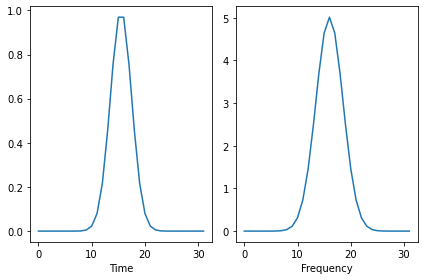

In [23]:
gaussian(32, 2)

При уменьшении std гауссова кривая сжимается а FFT расширяется

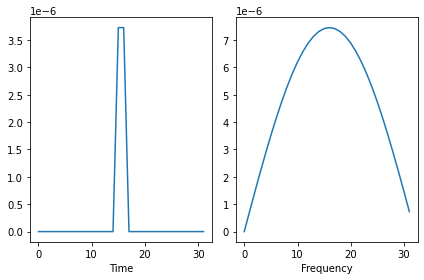

In [24]:
gaussian(32, 0.1)

При увеличении std гауссова кривая расширяется а FFT сжимается

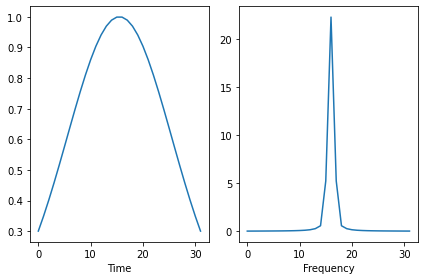

In [25]:
gaussian(32, 10)

Таким образом, можно говорить об обратной зависимости между гауссовой кривой и ее преобразованием Фурье

Упражнение 8.3
В упражнениях к главе 3 изучалось влияние на утечки спектра окна Хэмминга и некоторых других, предоставляемых NumPy.
Глубже понять эти окна можно, изучив их ДПФ.
В дополнение к гауссову окну, использованному в этой главе, создайте окно Хэмминга тех же размеров.
Дополните окно нулями и напечатайте его ДПФ. Какое окно больше подходит для фильтра НЧ?
Полезно напечатать ДПФ с логарифмическим масштабом по y.
Поэксперементируйте с разными окнами и разными размерами этих окон

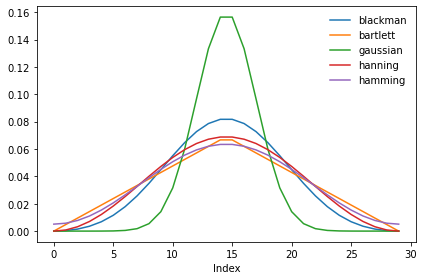

In [27]:
M = 30
std = 2.5
square_signal = SquareSignal(freq=440)
wave = square_signal.make_wave(duration=1, framerate=40000)
blackman = np.blackman(M)
bartlett = np.bartlett(M)
hamming = np.hamming(M)
hanning = np.hanning(M)
gaussian = scipy.signal.gaussian(M=M, std=std)

windows = [blackman, bartlett, gaussian, hanning, hamming]
names = ['blackman', 'bartlett', 'gaussian', 'hanning', 'hamming']

for window in windows:
    window /= sum(window)

for window, name in zip(windows, names):
    plt.plot(window, label=name)
decorate(xlabel='Index')

In [28]:
def zero_pad(array, n):
    res = np.zeros(n)
    res[:len(array)] = array
    return res


def window_dfts(windows, names):
    for window, name in zip(windows, names):
        padded = zero_pad(window, len(wave))
        dft_window = np.fft.rfft(padded)
        plt.plot(abs(dft_window), label=name)

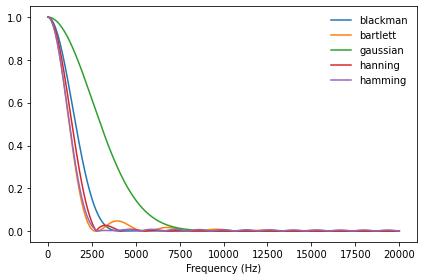

In [29]:
window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)')

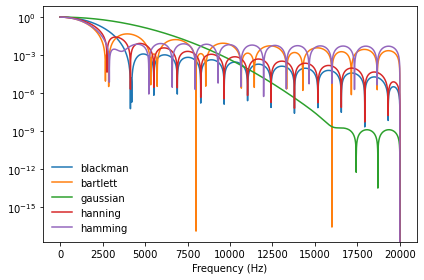

In [30]:
window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)', yscale='log')

В результате анализа всех графиков можно прийти к выводу, что окно Хемминга является лучшим вариантом для фильтрации
НЧ лучей, так как дает меньше всего "выпуклостей" и, как видно из логарифмического графика,
имеет самые стойкие боковые лепестки